<a href="https://colab.research.google.com/github/Stanleynjoroge/spatial_deep_learning/blob/main/Model3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds

# Load the EuroSAT dataset from tensorflow_datasets
(train_ds, val_ds, test_ds), info = tfds.load(
    'eurosat/rgb',
    split=['train[:70%]', 'train[70%:85%]', 'train[85%:]'],
    as_supervised=True,  # Dataset includes (image, label)
    with_info=True
)

In [ ]:
# Preprocessing function: resize images to 64x64 and normalize pixel values to [0, 1]
def preprocess_image(image, label):
    image = tf.image.resize(image, (64, 64))  # Resize to 64x64
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1]
    return image, label

In [ ]:
# Apply preprocessing to the dataset
train_ds = train_ds.map(preprocess_image)
val_ds = val_ds.map(preprocess_image)
test_ds = test_ds.map(preprocess_image)

# Batch and prefetch the dataset
batch_size = 64
train_ds = train_ds.shuffle(1000).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
val_ds = val_ds.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
test_ds = test_ds.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

# Build a CNN model for classification
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(info.features['label'].num_classes, activation='softmax')  # Output layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 137s 463ms/step - accuracy: 0.9457 - loss: 0.1536 - val_accuracy: 0.8333 - val_loss: 0.6352
Epoch 2/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 131s 441ms/step - accuracy: 0.9505 - loss: 0.1428 - val_accuracy: 0.8684 - val_loss: 0.4947
Epoch 3/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 131s 443ms/step - accuracy: 0.9531 - loss: 0.1335 - val_accuracy: 0.8541 - val_loss: 0.5216
Epoch 4/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 131s 441ms/step - accuracy: 0.9608 - loss: 0.1128 - val_accuracy: 0.8501 - val_loss: 0.5685
Epoch 5/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 144s 447ms/step - accuracy: 0.9595 - loss: 0.1152 - val_accuracy: 0.8627 - val_loss: 0.5138
Epoch 6/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 131s 441ms/step - accuracy: 0.9665 - loss: 0.1009 - val_accuracy: 0.8627 - val_loss: 0.5528
Epoch 7/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 131s 442ms/step - accuracy: 0.9672 - loss: 0.0963 - val_accuracy: 0.8679 - val_loss: 0.5531
Epoch 8/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 133s 448ms/step - accuracy: 0.9712 -

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_ds)
print('Test accuracy:', test_acc)

64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - accuracy: 0.8619 - loss: 0.7295
Test accuracy: 0.860987663269043


In [ ]:
# Save the trained model
model.save('eurosat_model.keras')

In [ ]:
from google.colab import files
files.download('eurosat_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

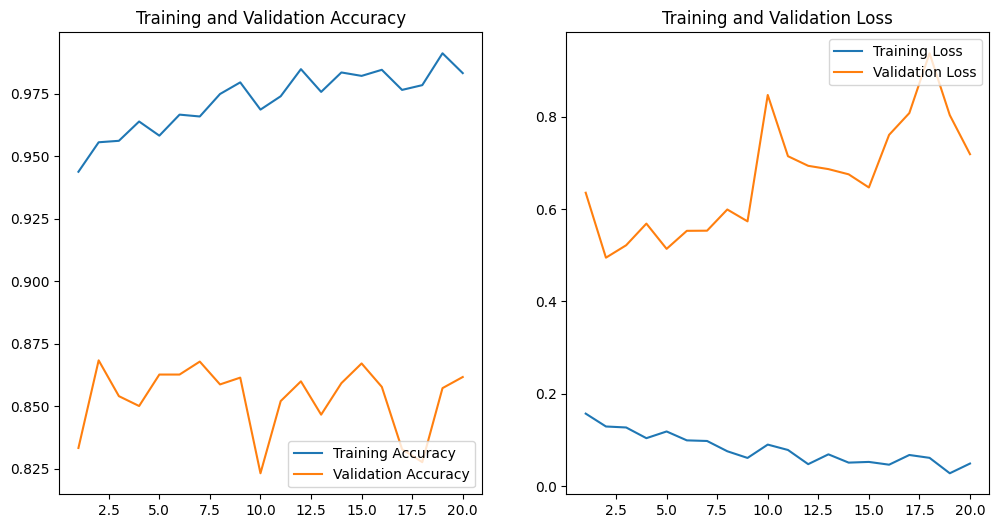

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()